<a href="https://colab.research.google.com/github/pritkudale/Code_for_LinkedIn/blob/main/Logistic_vs_multi_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-838111943163>:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

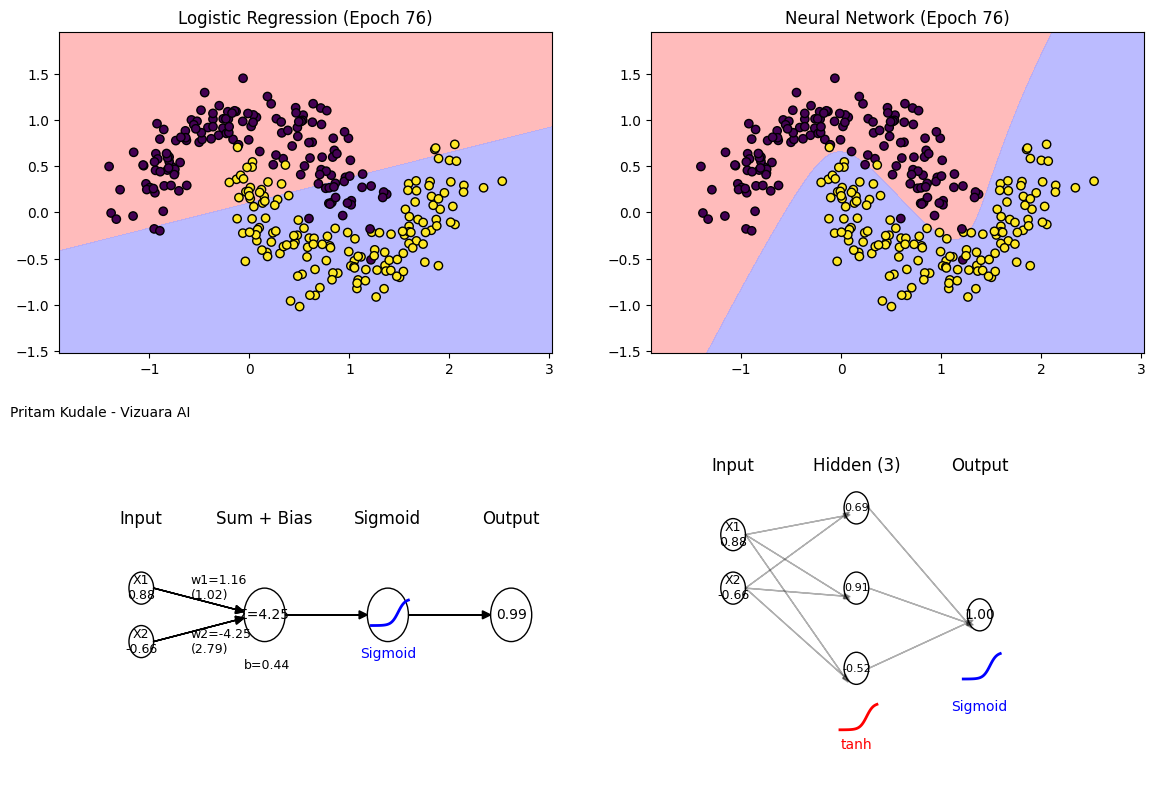

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from sklearn.datasets import make_moons
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from scipy.special import expit

plt.tight_layout()

# Generate dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Initialize models
classes = np.unique(y)
log_reg = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, random_state=0)
log_reg.partial_fit(X, y, classes=classes)
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', solver='sgd',
                    learning_rate_init=0.5, max_iter=1, warm_start=True, random_state=0)
mlp.partial_fit(X, y, classes=classes)

# Setup figure with 2x2 grid
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.4, wspace=0.2)
ax_log = fig.add_subplot(gs[0, 0])
ax_nn = fig.add_subplot(gs[0, 1])
ax_log_arch = fig.add_subplot(gs[1, 0])
ax_nn_arch = fig.add_subplot(gs[1, 1])

# Function to setup logistic regression architecture
def setup_logistic_architecture(ax):
    ax.axis([0, 12, 0, 6])
    ax.axis('off')
    # Nodes
    input_nodes = [plt.Circle((2, 4-i), 0.3, fc='white', ec='k') for i in range(2)]
    sum_node = plt.Circle((5, 3.5), 0.5, fc='white', ec='k')
    activation_node = plt.Circle((8, 3.5), 0.5, fc='white', ec='k')
    output_node = plt.Circle((11, 3.5), 0.5, fc='white', ec='k')
    for node in input_nodes + [sum_node, activation_node, output_node]:
        ax.add_patch(node)
    # Labels and arrows
    ax.text(1, 7.2, "Pritam Kudale - Vizuara AI", ha='center', fontsize=10)

    ax.text(2, 5.2, "Input", ha='center', fontsize=12)
    ax.text(5, 5.2, "Sum + Bias", ha='center', fontsize=12)
    ax.text(8, 5.2, "Sigmoid", ha='center', fontsize=12)
    ax.text(11, 5.2, "Output", ha='center', fontsize=12)
    for x in [2.3, 2.3]:
        ax.arrow(x, 4, 2, -0.4, head_width=0.15, head_length=0.2, fc='k')
        ax.arrow(x, 3, 2, 0.4, head_width=0.15, head_length=0.2, fc='k')
    ax.arrow(5.5, 3.5, 1.8, 0, head_width=0.15, head_length=0.2, fc='k')
    ax.arrow(8.5, 3.5, 1.8, 0, head_width=0.15, head_length=0.2, fc='k')
    # Sigmoid curve
    x_sig = np.linspace(7.6, 8.5, 50)
    y_sig = expit((x_sig-8.25)*12)*0.5 + 3.3
    ax.plot(x_sig, y_sig, 'b-', lw=2)
    ax.text(8, 2.7, "Sigmoid", ha='center', fontsize=10, color='b')
    # Dynamic elements
    ax.input_texts = [ax.text(2, 4-i, f'X{i+1}\n0.00', ha='center', va='center', fontsize=9) for i in range(2)]
    ax.weight_labels = [ax.text(3.2, 4-i, f'w{i+1}=0.00', ha='left', va='center', fontsize=9) for i in range(2)]
    ax.sum_text = ax.text(5, 3.5, 'Σ=0.00', ha='center', va='center', fontsize=10)
    ax.bias_text = ax.text(4.5, 2.5, 'b=0.00', fontsize=9)
    ax.output_text = ax.text(11, 3.5, '0.00', ha='center', va='center', fontsize=10)
    return ax

# Function to setup MLP architecture
def setup_mlp_architecture(ax):
    ax.axis([0, 12, 0, 6])
    ax.axis('off')
    # Nodes
    input_nodes = [plt.Circle((2, 5-i), 0.3, fc='white', ec='k') for i in range(2)]
    hidden_nodes = [plt.Circle((5, 5.5-j*1.5), 0.3, fc='white', ec='k') for j in range(3)]
    output_node = plt.Circle((8, 3.5), 0.3, fc='white', ec='k')
    for node in input_nodes + hidden_nodes + [output_node]:
        ax.add_patch(node)
    # Labels
    ax.text(2, 6.2, "Input", ha='center', fontsize=12)
    ax.text(5, 6.2, "Hidden (3)", ha='center', fontsize=12)
    ax.text(8, 6.2, "Output", ha='center', fontsize=12)
    # Arrows (simplified)
    for i in range(2):
        for j in range(3):
            ax.arrow(2.3, 5-i, 2.4, (5.5-j*1.5 - (5-i))-0.15, head_width=0.1, head_length=0.15, fc='k', alpha=0.3)
    for j in range(3):
        ax.arrow(5.3, 5.5-j*1.5, 2.4, (3.5 - (5.5-j*1.5))-0.15, head_width=0.1, head_length=0.15, fc='k', alpha=0.3)
    # Activation labels
    # ax.text(5, 1.0, "tanh", ha='center', fontsize=10, color='r')
    # ax.text(8, 1.0, "Sigmoid", ha='center', fontsize=10, color='b')

     # tanh curve
    x_sig = np.linspace(4.6, 5.5, 50)
    y_sig = np.tanh((x_sig - 5.25) * 6) * 0.25 + 1.6
    ax.plot(x_sig, y_sig, 'r-', lw=2)
    ax.text(5, 1, "tanh", ha='center', fontsize=10, color='r')

     # Sigmoid curve
    x_sig = np.linspace(7.6, 8.5, 50)
    y_sig = expit((x_sig-8.25)*12)*0.5 + 2.3
    ax.plot(x_sig, y_sig, 'b-', lw=2)
    ax.text(8, 1.7, "Sigmoid", ha='center', fontsize=10, color='b')

    # Dynamic elements
    ax.input_texts = [ax.text(2, 5-i, f'X{i+1}\n0.00', ha='center', va='center', fontsize=9) for i in range(2)]
    ax.hidden_texts = [ax.text(5, 5.5-j*1.5, '0.00', ha='center', va='center', fontsize=8) for j in range(3)]
    ax.output_text = ax.text(8, 3.5, '0.00', ha='center', va='center', fontsize=10)
    return ax

# Initialize architectures
setup_logistic_architecture(ax_log_arch)
setup_mlp_architecture(ax_nn_arch)

def update(frame):
    log_reg.partial_fit(X, y)
    mlp.partial_fit(X, y)

    # Update decision boundaries
    Z_log = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)
    Z_nn = mlp.predict_proba(grid)[:, 1].reshape(xx.shape)

    ax_log.clear()
    ax_log.contourf(xx, yy, Z_log, alpha=0.8, levels=[0, 0.5, 1], colors=['#FFAAAA', '#AAAAFF'])
    ax_log.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    ax_log.set_title(f'Logistic Regression (Epoch {frame+2})', fontsize=12)
    ax_log.set_xlim(x_min, x_max)
    ax_log.set_ylim(y_min, y_max)

    ax_nn.clear()
    ax_nn.contourf(xx, yy, Z_nn, alpha=0.8, levels=[0, 0.5, 1], colors=['#FFAAAA', '#AAAAFF'])
    ax_nn.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    ax_nn.set_title(f'Neural Network (Epoch {frame+2})', fontsize=12)
    ax_nn.set_xlim(x_min, x_max)
    ax_nn.set_ylim(y_min, y_max)

    # Update logistic architecture
    X_sample = X[0]
    coef, intercept = log_reg.coef_[0], log_reg.intercept_[0]
    z = X_sample @ coef + intercept
    ax_log_arch.input_texts[0].set_text(f'X1\n{X_sample[0]:.2f}')
    ax_log_arch.input_texts[1].set_text(f'X2\n{X_sample[1]:.2f}')
    ax_log_arch.weight_labels[0].set_text(f'w1={coef[0]:.2f}\n({coef[0]*X_sample[0]:.2f})')
    ax_log_arch.weight_labels[1].set_text(f'w2={coef[1]:.2f}\n({coef[1]*X_sample[1]:.2f})')
    ax_log_arch.sum_text.set_text(f'Σ={z:.2f}')
    ax_log_arch.bias_text.set_text(f'b={intercept:.2f}')
    ax_log_arch.output_text.set_text(f'{expit(z):.2f}')

    # Update MLP architecture
    if hasattr(mlp, 'coefs_'):
        X_sample = X[0]
        hidden = np.tanh(X_sample @ mlp.coefs_[0] + mlp.intercepts_[0])
        output = expit(hidden @ mlp.coefs_[1] + mlp.intercepts_[1])
        ax_nn_arch.input_texts[0].set_text(f'X1\n{X_sample[0]:.2f}')
        ax_nn_arch.input_texts[1].set_text(f'X2\n{X_sample[1]:.2f}')
        for j in range(3):
            ax_nn_arch.hidden_texts[j].set_text(f'{hidden[j]:.2f}')
        ax_nn_arch.output_text.set_text(f'{output[0]:.2f}')

    return []

# Create and save animation

anim = animation.FuncAnimation(fig, update, frames=75, interval=200, blit=False)
writer = PillowWriter(fps=5)
anim.save("nn_logistic_animation.gif", writer=writer)
plt.tight_layout()
plt.show()